In [2]:
import pandas as pd

In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score
from imblearn.metrics import geometric_mean_score
import numpy as np
import pandas as pd

In [3]:
def compute_metrics(results,labels,predictions):

    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average='weighted')
    recall = recall_score(labels, predictions, average='weighted')
    f1 = f1_score(labels, predictions, average='weighted')
    gmean = geometric_mean_score(labels, predictions, average='weighted')

    print("ACCURACY: " + str(accuracy))
    print("PRECISION: " + str(precision))
    print("RECALL: " + str(recall))
    print("F1: " + str(f1))
    print("Gmean: " + str(gmean))

    return accuracy, precision, recall, f1, gmean

In [4]:
all_test_results = pd.read_csv("/kaggle/input/test-results-from-classifier/final_testing_results_merged.csv")
all_test_results

,Unnamed: 0.1,Unnamed: 0,id,text,expected_label,predicted_label
0,0,0,0,"GAITHERSBURG, Md. and GUANGZHOU, China , Jan. ...",FAKE,FAKE
1,1,1,1,Democrats say fitting submarine with nuclear w...,FAKE,FAKE
2,2,2,2,Davao City Mayor Sara Duterte on Monday announ...,FAKE,FAKE
3,3,3,3,In a bid to avert the possible outbreak of Las...,FAKE,FAKE
4,4,4,4,"A slew of economic reports, such as Retails Sa...",FAKE,TRUE
...,...,...,...,...,...,...
52360,11614,11614,11614,If Sydney had been Texas 10 customers would ha...,TRUE,FAKE
52361,11615,11615,11615,"Sydney siege on all day, but we haven't seen a...",TRUE,FAKE
52362,11616,11616,11616,"A solitary lunatic, with a history of trauma, ...",TRUE,FAKE
52363,11617,11617,11617,US soccer has a new First Couple: USWNT's Sydn...,TRUE,FAKE


In [5]:
def clean_text(text):
    return text.encode("ascii", errors="ignore").decode()

In [6]:
crime_df = pd.read_feather("/kaggle/input/testing-datasets/ProcessedTestingDatasets-20240422T011655Z-001/ProcessedTestingDatasets/crime_dataset.feather")
crime_df['text'] = crime_df['text'].apply(clean_text)
crime_df

,index,text,label,metadata
0,309,Does This Video Show a Thwarted Mothers Day Ro...,0,"{'article_category_phase1': 'Crime', 'article_..."
1,20608,Should You Call #77 or 112 to Contact the Poli...,1,"{'article_category_phase1': 'Crime', 'article_..."
2,20609,Should You Call #77 or 112 to Contact the Poli...,1,"{'article_category_phase1': 'Crime', 'article_..."
3,21177,Was a Child Named Chloe Jones Abducted by a Cr...,1,"{'article_category_phase1': 'Crime', 'article_..."
4,21178,Was a Child Named Chloe Jones Abducted by a Cr...,1,"{'article_category_phase1': 'Crime', 'article_..."
...,...,...,...,...
813,15393,Is a Murderous Taxi Driver Killing People in H...,1,{'article_category_phase1': 'Viral Phenomena ...
814,15394,Is a Murderous Taxi Driver Killing People in H...,1,{'article_category_phase1': 'Viral Phenomena ...
815,15395,Is a Murderous Taxi Driver Killing People in H...,1,{'article_category_phase1': 'Viral Phenomena ...
816,15397,Is a Murderous Taxi Driver Killing People in H...,1,{'article_category_phase1': 'Viral Phenomena ...


In [17]:
len(crime_df['text'].unique())

114

In [7]:
health_df = pd.read_feather("/kaggle/input/testing-datasets/ProcessedTestingDatasets-20240422T011655Z-001/ProcessedTestingDatasets/health_covid_claims_dataset.feather")
health_df['text'] = health_df['text'].apply(clean_text)
health_df

,text,label,title,metadata
0,Facebook has shuttered a popular group for Mic...,0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,"{'label': 0, 'subcategory': 'false news'}"
1,We can now officially put to rest all comparis...,1,Other Viewpoints: COVID-19 is worse than the flu,"{'label': 1, 'subcategory': 'true'}"
2,The Ministry of Health in Bermuda has confirme...,1,Bermuda's COVID-19 cases surpass 100,"{'label': 1, 'subcategory': 'true'}"
3,"Purdue University President Mitch Daniels, the...",0,Purdue University says students face 'close to...,"{'label': 0, 'subcategory': 'partially false'}"
4,Locking down much of the country may have help...,0,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...,"{'label': 0, 'subcategory': 'false news'}"
...,...,...,...,...
3114,Quarantine advised for 80 persons across the S...,1,2019-nCoV: Health dept. on full alert,"{'label': 1, 'subcategory': 'true'}"
3115,South Sudan has begun screening all travelers ...,1,Screening machine for corona virus launched at...,"{'label': 1, 'subcategory': 'true'}"
3116,Coronavirus (2019-nCoV) is a new respiratory i...,1,Coronavirus (2019-nCoV),"{'label': 1, 'subcategory': 'true'}"
3117,Characterizing Patients Hospitalized With COVI...,0,Characterizing Patients Hospitalized With COVI...,"{'label': 0, 'subcategory': 'false news'}"


In [20]:
len(health_df['text'].unique())

3060

In [8]:
politics_pheme_df = pd.read_csv("/kaggle/input/testing-datasets/ProcessedTestingDatasets-20240422T011655Z-001/ProcessedTestingDatasets/politics_pheme.csv")
politics_pheme_df['text'] = politics_pheme_df['text'].apply(clean_text)
politics_pheme_df

,Unnamed: 0.1,Unnamed: 0,text,label,author,metadata,domain
0,0,0,"Breaking: At least 10 dead, 5 injured after tO...",0,H_E_Samuel,{'account_date': 'Tue Oct 04 09:36:17 +0000 20...,POLITICS
1,1,1,France: 10 people dead after shooting at HQ of...,0,euronews,{'account_date': 'Wed Mar 18 12:57:11 +0000 20...,POLITICS
2,2,2,Ten killed in shooting at headquarters of Fren...,0,Channel4News,{'account_date': 'Mon Apr 28 14:29:37 +0000 20...,POLITICS
3,3,3,BREAKING: 10 dead in shooting at headquarters ...,0,AlArabiya_Eng,{'account_date': 'Sat Feb 28 08:31:32 +0000 20...,POLITICS
4,4,4,Reuters: 10 people shot dead at headquarters o...,0,SkyNewsBreak,{'account_date': 'Wed Nov 04 11:25:45 +0000 20...,POLITICS
...,...,...,...,...,...,...,...
6419,6419,6419,Sydney siege ends as police storm Lindt Cafe a...,0,guardian,{'account_date': 'Thu Nov 05 23:49:19 +0000 20...,POLITICS
6420,6420,6420,"Breaking News: #SydneySiege is over, according...",0,FoxNews,{'account_date': 'Sat Mar 17 19:01:26 +0000 20...,POLITICS
6421,6421,6421,Watch gunfire erupt and hostages flee chocolat...,0,NBCNews,{'account_date': 'Tue Mar 18 23:19:17 +0000 20...,POLITICS
6422,6422,6422,Authorities have confirmed that #sydneysiege i...,0,YahooNewsUK,{'account_date': 'Fri Feb 13 15:44:54 +0000 20...,POLITICS


In [9]:
politics_politifact_df = pd.read_feather("/kaggle/input/testing-datasets/ProcessedTestingDatasets-20240422T011655Z-001/ProcessedTestingDatasets/politics_politifact.feather")
politics_politifact_df['text'] = politics_politifact_df['text'].apply(clean_text)
politics_politifact_df

,text,label,metadata
0,John McCain opposed bankruptcy protections for...,0,"{'author': 'Barack Obama', 'factcheck_analysis..."
1,"""Bennie Thompson actively cheer-led riots in t...",1,"{'author': 'Matt Gaetz', 'factcheck_analysis_l..."
2,"SaysMaggie Hassan was ""out of state on 30 days...",0,"{'author': 'Kelly Ayotte', 'factcheck_analysis..."
3,"""BUSTED: CDC Inflated COVID Numbers, Accused o...",1,"{'author': 'Bloggers', 'factcheck_analysis_lin..."
4,"""I'm the only (Republican)candidate that has a...",0,"{'author': 'Bobby Jindal', 'factcheck_analysis..."
...,...,...,...
21147,Says the large trade deficit with Japan stems ...,1,"{'author': 'Donald Trump', 'factcheck_analysis..."
21148,"""Tens of thousands"" of people leave New York e...",1,"{'author': 'Donald Trump Jr.', 'factcheck_anal..."
21149,"""I have fought for our shared values without b...",1,"{'author': 'Chris Abele', 'factcheck_analysis_..."
21150,"""Germany halts all Covid-19 vaccines, says the...",1,"{'author': 'Bloggers', 'factcheck_analysis_lin..."


In [10]:
science_df = pd.read_feather("/kaggle/input/testing-datasets/ProcessedTestingDatasets-20240422T011655Z-001/ProcessedTestingDatasets/science_isot.feather")
science_df['text'] = science_df['text'].apply(clean_text)
science_df

,index,text,label,title,subject,date
0,0,"Donald Trump stopped in Hawaii, which is total...",1,Hawaiians Had The Perfect Signs To Infuriate ...,News,2017-11-04
1,1,Who knew that Rick Perry would come up with an...,1,Trumpâ€™s Energy Secretary Has An Idea For St...,News,2017-11-02
2,2,Like increasing numbers of heartless people on...,1,Bill Oâ€™Reilly Writes INFURIATING Blog Post ...,News,2017-10-02
3,3,"Let s just put it this way, if world leaders r...",1,Global Survey HUMILIATES Trump After He Claim...,News,2017-09-20
4,4,Leave it to Donald Trump to exploit a tragedy....,1,Trump Shamefully Uses Hurricane Devastation T...,News,2017-09-13
...,...,...,...,...,...,...
868,876,"HAMAR, Norway (Reuters) - Young Norwegians, po...",0,Young generation revulsed by Breivik may sway ...,worldnews,2017-09-06
869,877,(Reuters) - British billionaire and adventurer...,0,Billionaire Branson to ride out Hurricane Irma...,worldnews,2017-09-05
870,878,"XIAMEN, China (Reuters) - Chinese President Xi...",0,Xi urges BRICS grouping to push for more 'just...,worldnews,2017-09-05
871,879,"XIAMEN, China (Reuters) - The nations of the B...",0,BRICS countries deplore North Korean nuclear t...,worldnews,2017-09-04


In [11]:
social_df = pd.read_feather("/kaggle/input/testing-datasets/ProcessedTestingDatasets-20240422T011655Z-001/ProcessedTestingDatasets/social_isot.feather")
social_df['text'] = social_df['text'].apply(clean_text)
social_df

,level_0,index,text,label,title,subject,date
0,0,0,Donald Trump just couldn t wish all Americans ...,1,Donald Trump Sends Out Embarrassing New Yearâ...,News,2017-12-31
1,1,1,House Intelligence Committee Chairman Devin Nu...,1,Drunk Bragging Trump Staffer Started Russian ...,News,2017-12-31
2,2,2,"On Friday, it was revealed that former Milwauk...",1,Sheriff David Clarke Becomes An Internet Joke...,News,2017-12-30
3,3,3,"On Christmas day, Donald Trump announced that ...",1,Trump Is So Obsessed He Even Has Obamaâ€™s Na...,News,2017-12-29
4,4,4,Pope Francis used his annual Christmas Day mes...,1,Pope Francis Just Called Out Donald Trump Dur...,News,2017-12-25
...,...,...,...,...,...,...,...
21704,21706,21734,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0,'Fully committed' NATO backs new U.S. approach...,worldnews,2017-08-22
21705,21707,21735,"LONDON (Reuters) - LexisNexis, a provider of l...",0,LexisNexis withdrew two products from Chinese ...,worldnews,2017-08-22
21706,21708,21736,MINSK (Reuters) - In the shadow of disused Sov...,0,Minsk cultural hub becomes haven from authorities,worldnews,2017-08-22
21707,21709,21737,MOSCOW (Reuters) - Vatican Secretary of State ...,0,Vatican upbeat on possibility of Pope Francis ...,worldnews,2017-08-22


In [12]:
crime_test_results = all_test_results[all_test_results['text'].isin(crime_df['text'])]
crime_test_results

,Unnamed: 0.1,Unnamed: 0,id,text,expected_label,predicted_label
16745,0,0,0,Does This Video Show a Thwarted Mothers Day Ro...,TRUE,TRUE
16746,1,1,1,Should You Call #77 or 112 to Contact the Poli...,FAKE,TRUE
16747,2,2,2,Was a Child Named Chloe Jones Abducted by a Cr...,FAKE,TRUE
16748,3,3,3,Colored Stickers Target Homes of Dog Owners?,FAKE,TRUE
16749,4,4,4,"Crime in Sweden, Part III: Does Sweden Have No...",FAKE,TRUE
...,...,...,...,...,...,...
16854,109,109,109,Is the Owner of Jimmy Johns a Big-Game Hunter?,TRUE,TRUE
16855,110,110,110,Australian Gun Stats,FAKE,FAKE
16856,111,111,111,Were Hate Crime Charges Against BLM Kidnappers...,FAKE,TRUE
16857,112,112,112,Is a Murderous Taxi Driver Killing People in H...,FAKE,TRUE


In [20]:
print(crime_test_results['expected_label'].value_counts())
print(crime_test_results['predicted_label'].value_counts())

expected_label
FAKE    71
TRUE    43
Name: count, dtype: int64
predicted_label
TRUE    101
FAKE     13
Name: count, dtype: int64


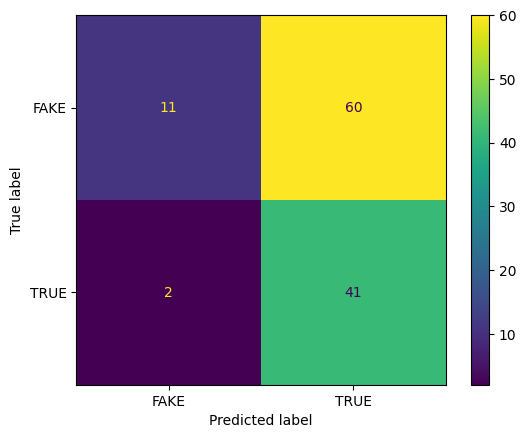

In [14]:
labels = list(crime_test_results['expected_label'])
predictions = list(crime_test_results['predicted_label'])

cm_validate = confusion_matrix(labels, predictions)

display_labels = ['FAKE', 'TRUE']
disp_validate = ConfusionMatrixDisplay(confusion_matrix=cm_validate,display_labels=display_labels)
disp_validate.plot()

In [61]:
compute_metrics(crime_test_results, crime_test_results["expected_label"], crime_test_results["predicted_label"])

ACCURACY: 0.45614035087719296
PRECISION: 0.6801084966796275
RECALL: 0.45614035087719296
F1: 0.3779065719855193
Gmean: 0.5454632276620583


(0.45614035087719296,
 0.6801084966796275,
 0.45614035087719296,
 0.3779065719855193,
 0.5454632276620583)

In [15]:
health_test_results = all_test_results[all_test_results['text'].isin(health_df['text'])]
health_test_results

,Unnamed: 0.1,Unnamed: 0,id,text,expected_label,predicted_label
0,0,0,0,"GAITHERSBURG, Md. and GUANGZHOU, China , Jan. ...",FAKE,FAKE
1,1,1,1,Democrats say fitting submarine with nuclear w...,FAKE,FAKE
2,2,2,2,Davao City Mayor Sara Duterte on Monday announ...,FAKE,FAKE
3,3,3,3,In a bid to avert the possible outbreak of Las...,FAKE,FAKE
4,4,4,4,"A slew of economic reports, such as Retails Sa...",FAKE,TRUE
...,...,...,...,...,...,...
22043,1297,1297,1297,I am the First Lady of HR with a stellar caree...,TRUE,TRUE
22044,1298,1298,1298,"Apr 24, 2020 at 4:31 PM Nursing home faced bac...",TRUE,TRUE
22045,1299,1299,1299,Here is the technique we use to heal unseen ne...,TRUE,FAKE
22046,1300,1300,1300,Characterizing Patients Hospitalized With COVI...,TRUE,FAKE


In [16]:
health_test_results['expected_label'] = health_test_results['expected_label'].map({'FAKE':'TRUE','TRUE':'FAKE'})
health_test_results

/tmp/ipykernel_33/989142253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_test_results['expected_label'] = health_test_results['expected_label'].map({'FAKE':'TRUE','TRUE':'FAKE'})


,Unnamed: 0.1,Unnamed: 0,id,text,expected_label,predicted_label
0,0,0,0,"GAITHERSBURG, Md. and GUANGZHOU, China , Jan. ...",TRUE,FAKE
1,1,1,1,Democrats say fitting submarine with nuclear w...,TRUE,FAKE
2,2,2,2,Davao City Mayor Sara Duterte on Monday announ...,TRUE,FAKE
3,3,3,3,In a bid to avert the possible outbreak of Las...,TRUE,FAKE
4,4,4,4,"A slew of economic reports, such as Retails Sa...",TRUE,TRUE
...,...,...,...,...,...,...
22043,1297,1297,1297,I am the First Lady of HR with a stellar caree...,FAKE,TRUE
22044,1298,1298,1298,"Apr 24, 2020 at 4:31 PM Nursing home faced bac...",FAKE,TRUE
22045,1299,1299,1299,Here is the technique we use to heal unseen ne...,FAKE,FAKE
22046,1300,1300,1300,Characterizing Patients Hospitalized With COVI...,FAKE,FAKE


In [21]:
print(health_test_results['expected_label'].value_counts())
print(health_test_results['predicted_label'].value_counts())

expected_label
TRUE    2014
FAKE    1045
Name: count, dtype: int64
predicted_label
TRUE    1794
FAKE    1265
Name: count, dtype: int64


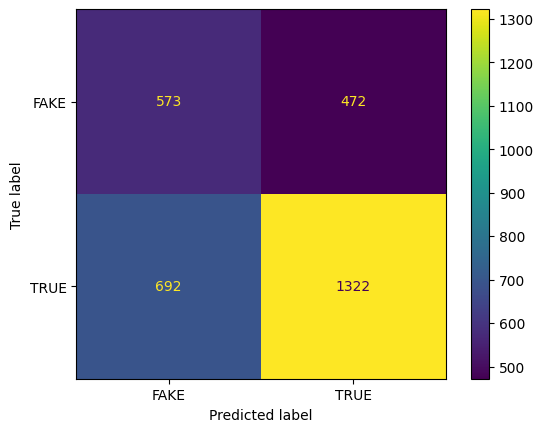

In [17]:
labels = list(health_test_results['expected_label'])
predictions = list(health_test_results['predicted_label'])

cm_validate = confusion_matrix(labels, predictions)

display_labels = ['FAKE', 'TRUE']
disp_validate = ConfusionMatrixDisplay(confusion_matrix=cm_validate,display_labels=display_labels)
disp_validate.plot()

In [8]:
compute_metrics(health_test_results, health_test_results["expected_label"], health_test_results["predicted_label"])

ACCURACY: 0.6194834913370383
PRECISION: 0.6399038894312996
RECALL: 0.6194834913370383
F1: 0.6266115141708858
Gmean: 0.6021219762525516


(0.6194834913370383,
 0.6399038894312996,
 0.6194834913370383,
 0.6266115141708858,
 0.6021219762525516)

In [18]:
pheme_test_results = all_test_results[all_test_results['text'].isin(politics_pheme_df['text'])]
pheme_test_results

,Unnamed: 0.1,Unnamed: 0,id,text,expected_label,predicted_label
18,18,18,18,BREAKING NEWS: Ten dead in shooting at headqua...,TRUE,TRUE
19,19,19,19,New vid of Paris attack on #CharlieHebdo filme...,FAKE,TRUE
20,20,20,20,Jewish bakery hit in new shooting and hostage ...,FAKE,TRUE
21,21,21,21,Trocadero square in Paris evacuated. Policemen...,FAKE,TRUE
22,22,22,22,Egypt top Muslim institution Al Azhar and the ...,TRUE,TRUE
...,...,...,...,...,...,...
52360,11614,11614,11614,If Sydney had been Texas 10 customers would ha...,TRUE,FAKE
52361,11615,11615,11615,"Sydney siege on all day, but we haven't seen a...",TRUE,FAKE
52362,11616,11616,11616,"A solitary lunatic, with a history of trauma, ...",TRUE,FAKE
52363,11617,11617,11617,US soccer has a new First Couple: USWNT's Sydn...,TRUE,FAKE


In [63]:
compute_metrics(pheme_test_results, pheme_test_results["expected_label"], pheme_test_results["predicted_label"])

ACCURACY: 0.643908969210174
PRECISION: 0.6836563455421221
RECALL: 0.643908969210174
F1: 0.6612437474192393
Gmean: 0.5109020936142833


(0.643908969210174,
 0.6836563455421221,
 0.643908969210174,
 0.6612437474192393,
 0.5109020936142833)

In [22]:
print(pheme_test_results['expected_label'].value_counts())
print(pheme_test_results['predicted_label'].value_counts())

expected_label
TRUE    4723
FAKE    1253
Name: count, dtype: int64
predicted_label
TRUE    4301
FAKE    1675
Name: count, dtype: int64


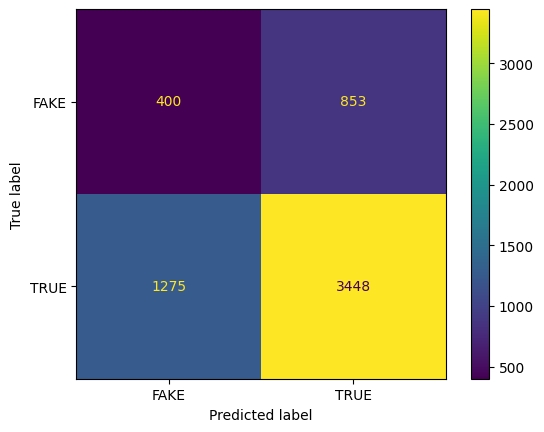

In [19]:
labels = list(pheme_test_results['expected_label'])
predictions = list(pheme_test_results['predicted_label'])

cm_validate = confusion_matrix(labels, predictions)

display_labels = ['FAKE', 'TRUE']
disp_validate = ConfusionMatrixDisplay(confusion_matrix=cm_validate,display_labels=display_labels)
disp_validate.plot()

In [23]:
politifact_test_results = all_test_results[all_test_results['text'].isin(politics_politifact_df['text'])]
politifact_test_results

,Unnamed: 0.1,Unnamed: 0,id,text,expected_label,predicted_label
17,17,17,17,Says Republican lawmakers delayed COVID-19 tes...,FAKE,FAKE
2523,2485,2485,2485,"Says ""Donald Trump says climate change is a ho...",TRUE,TRUE
2524,2486,2486,2486,"Post says a recent bill passed, and ""We get an...",FAKE,TRUE
2525,2487,2487,2487,"Says he is""cutting illegal immigration in half.""",FAKE,FAKE
2526,2488,2488,2488,"""There is racism physically built into some of...",TRUE,TRUE
...,...,...,...,...,...,...
51445,10699,10699,10699,"""The people of Rhode Island don't want same-se...",FAKE,FAKE
51446,10700,10700,10700,"Our ""kids cant openly celebrate Christmas or p...",FAKE,FAKE
51447,10701,10701,10701,"""Phoenix, Arizona, I'm told, is now the No. 2 ...",FAKE,FAKE
51448,10702,10702,10702,"""Only one out of 10 minimum wage workers today...",FAKE,FAKE


In [64]:
compute_metrics(politifact_test_results, politifact_test_results["expected_label"], politifact_test_results["predicted_label"])

ACCURACY: 0.5280760679313118
PRECISION: 0.5195890333946172
RECALL: 0.5280760679313118
F1: 0.5203768430345257
Gmean: 0.5126426581113166


(0.5280760679313118,
 0.5195890333946172,
 0.5280760679313118,
 0.5203768430345257,
 0.5126426581113166)

In [24]:
print(politifact_test_results['expected_label'].value_counts())
print(politifact_test_results['predicted_label'].value_counts())

expected_label
FAKE    11753
TRUE     9386
Name: count, dtype: int64
predicted_label
FAKE    13471
TRUE     7668
Name: count, dtype: int64


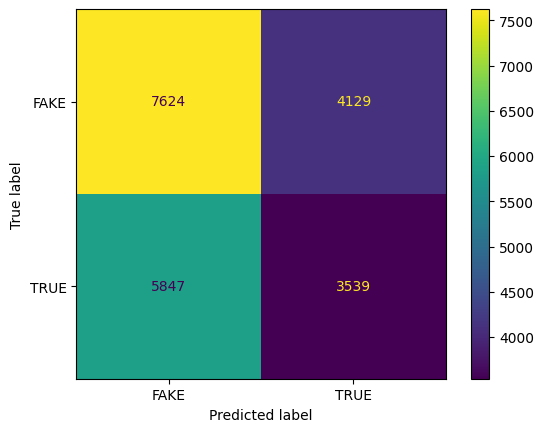

In [25]:
labels = list(politifact_test_results['expected_label'])
predictions = list(politifact_test_results['predicted_label'])

cm_validate = confusion_matrix(labels, predictions)

display_labels = ['FAKE', 'TRUE']
disp_validate = ConfusionMatrixDisplay(confusion_matrix=cm_validate,display_labels=display_labels)
disp_validate.plot()

In [27]:
science_test_results = all_test_results[all_test_results['text'].isin(science_df['text'])]
science_test_results

,Unnamed: 0.1,Unnamed: 0,id,text,expected_label,predicted_label
20747,1,1,1,"Donald Trump stopped in Hawaii, which is total...",FAKE,FAKE
20748,2,2,2,Who knew that Rick Perry would come up with an...,FAKE,FAKE
20749,3,3,3,Like increasing numbers of heartless people on...,FAKE,FAKE
20750,4,4,4,"Let s just put it this way, if world leaders r...",FAKE,FAKE
20751,5,5,5,Leave it to Donald Trump to exploit a tragedy....,FAKE,FAKE
...,...,...,...,...,...,...
21513,767,767,767,"HAMAR, Norway (Reuters) - Young Norwegians, po...",TRUE,TRUE
21514,768,768,768,(Reuters) - British billionaire and adventurer...,TRUE,FAKE
21515,769,769,769,"XIAMEN, China (Reuters) - Chinese President Xi...",TRUE,TRUE
21516,770,770,770,"XIAMEN, China (Reuters) - The nations of the B...",TRUE,TRUE


In [28]:
print(science_test_results['expected_label'].value_counts())
print(science_test_results['predicted_label'].value_counts())

expected_label
TRUE    462
FAKE    309
Name: count, dtype: int64
predicted_label
TRUE    451
FAKE    320
Name: count, dtype: int64


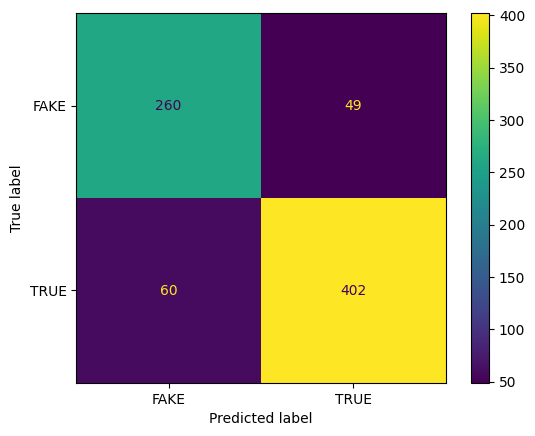

In [29]:
labels = list(science_test_results['expected_label'])
predictions = list(science_test_results['predicted_label'])

cm_validate = confusion_matrix(labels, predictions)

display_labels = ['FAKE', 'TRUE']
disp_validate = ConfusionMatrixDisplay(confusion_matrix=cm_validate,display_labels=display_labels)
disp_validate.plot()

In [65]:
compute_metrics(science_test_results, science_test_results["expected_label"], science_test_results["predicted_label"])

ACCURACY: 0.8586251621271076
PRECISION: 0.8597501660814273
RECALL: 0.8586251621271076
F1: 0.859009693453902
Gmean: 0.8557721692905075


(0.8586251621271076,
 0.8597501660814273,
 0.8586251621271076,
 0.859009693453902,
 0.8557721692905075)

In [30]:
social_test_results = all_test_results[all_test_results['text'].isin(social_df['text'])]
social_test_results

,Unnamed: 0.1,Unnamed: 0,id,text,expected_label,predicted_label
2519,2481,2481,2481,A letter to the editor appeared in The New Yor...,FAKE,FAKE
2520,2482,2482,2482,Anyone who knows anything about the Civil Righ...,FAKE,FAKE
2521,2483,2483,2483,PLEASE NOTE: No press allowed inside or anywhe...,FAKE,TRUE
2522,2484,2484,2484,President Barack Obama and First Lady Michelle...,FAKE,TRUE
11628,13,13,13,2 Corinthians 9:7 Each one must give as he ha...,FAKE,FAKE
...,...,...,...,...,...,...
42912,2166,2166,2166,BRUSSELS (Reuters) - NATO allies on Tuesday we...,TRUE,TRUE
42913,2167,2167,2167,"LONDON (Reuters) - LexisNexis, a provider of l...",TRUE,TRUE
42914,2168,2168,2168,MINSK (Reuters) - In the shadow of disused Sov...,TRUE,TRUE
42915,2169,2169,2169,MOSCOW (Reuters) - Vatican Secretary of State ...,TRUE,TRUE


In [31]:
print(social_test_results['expected_label'].value_counts())
print(social_test_results['predicted_label'].value_counts())

expected_label
FAKE    11101
TRUE     9775
Name: count, dtype: int64
predicted_label
FAKE    10599
TRUE    10277
Name: count, dtype: int64


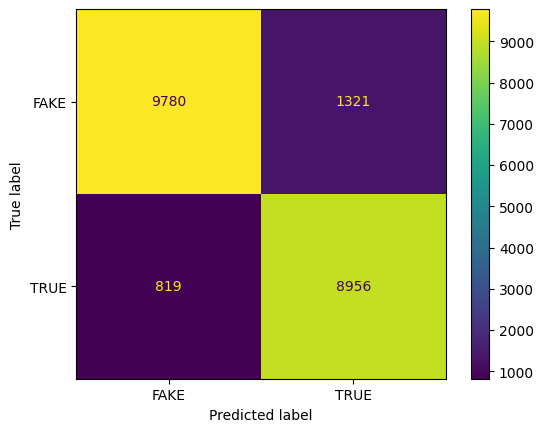

In [32]:
labels = list(social_test_results['expected_label'])
predictions = list(social_test_results['predicted_label'])

cm_validate = confusion_matrix(labels, predictions)

display_labels = ['FAKE', 'TRUE']
disp_validate = ConfusionMatrixDisplay(confusion_matrix=cm_validate,display_labels=display_labels)
disp_validate.plot()

In [66]:
compute_metrics(social_test_results, social_test_results["expected_label"], social_test_results["predicted_label"])

ACCURACY: 0.8974899406016478
PRECISION: 0.8987227698889488
RECALL: 0.8974899406016478
F1: 0.8975873901844607
Gmean: 0.8986075767674122


(0.8974899406016478,
 0.8987227698889488,
 0.8974899406016478,
 0.8975873901844607,
 0.8986075767674122)

In [57]:
len(crime_test_results)+len(health_test_results)+len(pheme_test_results)+len(politifact_test_results)+len(science_test_results)+len(social_test_results)

51935

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score
from imblearn.metrics import geometric_mean_score
import numpy as np
import pandas as pd

In [55]:
testing_datasets_merged = pd.concat([crime_df,health_df,politics_pheme_df,politics_politifact_df,science_df,social_df])
testing_datasets_merged['text'] = testing_datasets_merged['text'].apply(clean_text)
testing_datasets_merged

,index,text,label,metadata,title,Unnamed: 0.1,Unnamed: 0,author,domain,subject,date,level_0
0,309.0,Does This Video Show a Thwarted Mothers Day Ro...,0,"{'article_category_phase1': 'Crime', 'article_...",NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,20608.0,Should You Call #77 or 112 to Contact the Poli...,1,"{'article_category_phase1': 'Crime', 'article_...",NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2,20609.0,Should You Call #77 or 112 to Contact the Poli...,1,"{'article_category_phase1': 'Crime', 'article_...",NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,21177.0,Was a Child Named Chloe Jones Abducted by a Cr...,1,"{'article_category_phase1': 'Crime', 'article_...",NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4,21178.0,Was a Child Named Chloe Jones Abducted by a Cr...,1,"{'article_category_phase1': 'Crime', 'article_...",NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
21704,21734.0,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0,NaN,'Fully committed' NATO backs new U.S. approach...,NaN,NaN,NaN,NaN,worldnews,2017-08-22,21706.0
21705,21735.0,"LONDON (Reuters) - LexisNexis, a provider of l...",0,NaN,LexisNexis withdrew two products from Chinese ...,NaN,NaN,NaN,NaN,worldnews,2017-08-22,21707.0
21706,21736.0,MINSK (Reuters) - In the shadow of disused Sov...,0,NaN,Minsk cultural hub becomes haven from authorities,NaN,NaN,NaN,NaN,worldnews,2017-08-22,21708.0
21707,21737.0,MOSCOW (Reuters) - Vatican Secretary of State ...,0,NaN,Vatican upbeat on possibility of Pope Francis ...,NaN,NaN,NaN,NaN,worldnews,2017-08-22,21709.0


In [ ]:
# 54,095 rows 

In [33]:
classifier_results = pd.read_csv("/kaggle/input/clasifier-output/classifier_output_combined_nodups (1).csv")
classifier_results.head()

,Unnamed: 0.2,Unnamed: 0.1,index,Unnamed: 0,id,text,expected_domain,predicted_domain
0,0,0.0,0.0,0,0,Does This Video Show a Thwarted Mothers Day Ro...,CRIME,SOCIAL
1,1,1.0,1.0,1,1,Should You Call #77 or 112 to Contact the Poli...,CRIME,SOCIAL
2,3,3.0,3.0,3,3,Was a Child Named Chloe Jones Abducted by a Cr...,CRIME,SOCIAL
3,5,5.0,5.0,5,5,Colored Stickers Target Homes of Dog Owners?,CRIME,SOCIAL
4,15,15.0,15.0,15,15,"Crime in Sweden, Part III: Does Sweden Have No...",CRIME,SOCIAL


In [37]:
print(classifier_results['expected_domain'].value_counts())
print(classifier_results['predicted_domain'].value_counts())

expected_domain
POLITICS    27545
SOCIAL      20876
HEALTH       3059
SCIENCE       771
CRIME         114
Name: count, dtype: int64
predicted_domain
POLITICS    31619
HEALTH      11577
SCIENCE      5130
SOCIAL       4001
CRIME          38
Name: count, dtype: int64


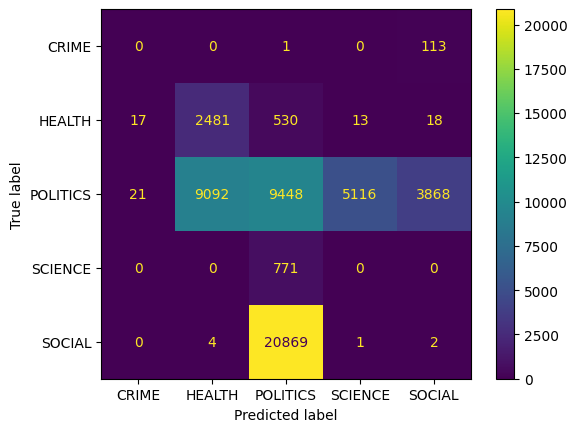

In [38]:
labels = list(classifier_results['expected_domain'])
predictions = list(classifier_results['predicted_domain'])

cm_validate = confusion_matrix(labels, predictions)

display_labels = ['CRIME', 'HEALTH','POLITICS','SCIENCE','SOCIAL']
disp_validate = ConfusionMatrixDisplay(confusion_matrix=cm_validate,display_labels=display_labels)
disp_validate.plot()